# Importing Libraries

In [ ]:
# !pip install plotly-express
# !pip install geopandas
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
# from numpy import rot90
import matplotlib.pyplot as plt

# Reading the Data

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/fall2022_assignments/Point_in_Time_Estimates_of_Homelessness_in_the_US_by_State.csv')
df.head(10)

,year,state,count_type,count
0,2018,AK,Overall Homeless,2016.0
1,2018,AL,Overall Homeless,3434.0
2,2018,AR,Overall Homeless,2712.0
3,2018,AZ,Overall Homeless,9865.0
4,2018,CA,Overall Homeless,129972.0
5,2018,CO,Overall Homeless,10857.0
6,2018,CT,Overall Homeless,3976.0
7,2018,DC,Overall Homeless,6904.0
8,2018,DE,Overall Homeless,1082.0
9,2018,FL,Overall Homeless,31030.0


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33376 entries, 0 to 33375
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        33376 non-null  int64  
 1   state       33376 non-null  object 
 2   count_type  33376 non-null  object 
 3   count       32940 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ MB


There are no null values in the data set except for the column **'count'** where there are **'436'** null values. We shall deep dive into this and decide the course of action as we proceed further.

In [ ]:
df.describe()

,year,count
count,33376.000000,32940.000000
mean,2013.867450,2904.482544
std,3.323378,19907.409461
min,2007.000000,0.000000
25%,2011.000000,27.000000
50%,2015.000000,208.500000
75%,2017.000000,1054.250000
max,2018.000000,647258.000000


In [ ]:
# df['count'].describe()

In [ ]:
# df['year'].astype('str').describe()

In [ ]:
df.rename(columns={"count_type":"homelessness", "count":"number"}, inplace = True)

In [ ]:
df['dup']=df.duplicated()
print(df.dup.unique())

[False]


In [ ]:
df=df.drop(columns='dup')

In [ ]:
df[df['number'].isna()]

,year,state,homelessness,number
8986,2016,MP,Overall Homeless,NaN
9042,2016,MP,Sheltered ES Homeless,NaN
9098,2016,MP,Sheltered TH Homeless,NaN
9154,2016,MP,Sheltered SH Homeless,NaN
9210,2016,MP,Sheltered Total Homeless,NaN
...,...,...,...,...
33123,2007,MP,Sheltered Total Chronically Homeless Individuals,NaN
33179,2007,MP,Unsheltered Chronically Homeless Individuals,NaN
33234,2007,MP,Homeless Veterans,NaN
33290,2007,MP,Sheltered Total Homeless Veterans,NaN


---

All the 436 rows of null values and its corresponding to State = 'MP' around(75%) rows provide no useful data, therefore we can drop these rows.

---



In [ ]:
df.dropna(subset=['number'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32940 entries, 0 to 33375
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          32940 non-null  int64  
 1   state         32940 non-null  object 
 2   homelessness  32940 non-null  object 
 3   number        32940 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


We have cleaned the data and handled all the null values.

In [ ]:
print(df.state.unique())
print()
print('The Total no. of states in our data is',df.state.nunique())


['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP' 'MS'
 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR'
 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY' 'Total']

The Total no. of states in our data is 56


Our state data is accurate with state and union territory codes of USA plus Total.

In [ ]:
state_region= {'AK':'west','CA':'west','NV':'west','UT':'west','CO':'west','WY':'west','ID':'west','OR':'west','MT':'west','WA':'west','HI':'west', 'GU':'west','MP':'west',
               'AZ':'southwest','NM':'southwest','TX':'southwest','OK':'southwest',
               'ND':'midwest','SD':'midwest','NE':'midwest','KS':'midwest','MO':'midwest','IA':'midwest','MN':'midwest','IL':'midwest','WI':'midwest','IN':'midwest','MI':'midwest','OH':'midwest',
               'AR':'southeast','LA':'southeast','MS':'southeast','AL':'southeast','GA':'southeast','TN':'southeast','DE':'southeast','KY':'southeast','WV':'southeast','DC':'southeast','VA':'southeast','NC':'southeast','SC':'southeast','FL':'southeast','MD':'southeast',
               'PA':'northeast','NY':'northeast','NJ':'northeast','CT':'northeast','RI':'northeast','MA':'northeast','NH':'northeast','ME':'northeast','VT':'northeast','PR':'northeast','VI':'northeast',
               'Total': 'Total'}
print(len(state_region))

56


In [ ]:

Territory = ['AS','GU','MP','PR','VI']  # These state codes  
df['region']=df['state'].map(state_region)
df['state_new'] = np.where(df['state'].isin(Territory),'Territory','State')

In [ ]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32940 entries, 0 to 33375
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          32940 non-null  int64  
 1   state         32940 non-null  object 
 2   homelessness  32940 non-null  object 
 3   number        32940 non-null  float64
 4   region        32940 non-null  object 
 5   state_new     32940 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ MB


,year,state,homelessness,number,region,state_new
31367,2008,CO,Sheltered Total Homeless Family Households,1215.0,west,State
19431,2014,Total,Chronically Homeless Individuals,83989.0,Total,State
7603,2017,NJ,Sheltered ES Homeless Unaccompanied Youth Age ...,254.0,northeast,State
6082,2017,NM,Sheltered ES Chronically Homeless Individuals,385.0,southwest,State
9632,2016,Total,Unsheltered Homeless Individuals,157204.0,Total,State


In [ ]:
df.to_csv('./cleaned_homeless.csv')

# Plots

### **Bhaskar Plots**


In [ ]:
#-1
# Plot Title -  Year wise count of Overall Homeless people in USA

# Assumption - Is the Trend of homeless people increasing or decreasing over the years?

# Insight - We do observe that the overall number of homeless people has been decreasing over the years from the above plot



#-2
# Plot Title - Year on Year Homeless Trend statewise

# Assumption - We see that the Overall homeless people have been decreasing over a period. Does it mean all the states had high no. of homeless people and has decreased over a period of time

# Insight - We do observe that the trends of statewise are very fluctuating and the Top 4 states such as 'CA','NY','FL','TX' have a huge number of homeless people compared to the other states



#-3
# Title - Year on Year Proportions of Homeless Type

# Assumptions - Are all the Homeless types equally distributed over the years?

# Insights -  We observe from the data that the number of Sheltered Homeless has the highest proportion of homeless people while 'Overall Homeless' and 'Sheltered Homeless' have an almost equal amount of proportion followed by 'Homeless_Individuals'



#-4 
# Title - Homeless count on Region level for all States

# Assumptions - What are the top states with homeless count in each respective region?

# Insights -  We observe that the North-East regions has 'NY','MA' , West is being dominated by 'CA', South-East by 'FL','GA' , South-West by 'TX','AZ' and all the top 4 states have almost equal amount of proportions in the midwest

In [ ]:
df.head()

,year,state,homelessness,number,region,state_new
0,2018,AK,Overall Homeless,2016.0,west,State
1,2018,AL,Overall Homeless,3434.0,southeast,State
2,2018,AR,Overall Homeless,2712.0,southeast,State
3,2018,AZ,Overall Homeless,9865.0,southwest,State
4,2018,CA,Overall Homeless,129972.0,west,State


In [ ]:
# Plotting the State wise map of homeless count



In [ ]:
# Bar Plot
import plotly.graph_objs as go

df2 = df[(df['homelessness'] == 'Overall Homeless') & (df['state'] == 'Total')]
barchart =  px.bar(df2, x = 'year' , y = 'number' , title = 'Year wise count of Overall Homeless people in USA' , color='year')
barchart




In [ ]:
df3 = df[(df['state'] != 'Total')]
df3 = df3.groupby(['state','year'])['number'].sum().reset_index()
df4 = df3.groupby('state')['number'].sum().reset_index()
 
# df3

In [ ]:
fig = px.pie(df2, values='region', names='homelessness', title='Ratio of homeless_count over year')
fig.show()

In [ ]:
df4 = df4.sort_values(by = 'number' ,ascending= False)
top_10_states = df4.head(10)
top_10_states = top_10_states['state'].unique()

In [ ]:
least_10_states = df4.iloc[45:]
least_10_states = least_10_states['state'].unique()
# df4.shape

In [ ]:
def state_ranking(df):
  if df['state'].isin(top_10_states) == True:
    return 'Top 10 Homeless States'
  elif df['state'].isin(least_10_states) == True:
    return 'Least 10 Homeless States'
  else:
    return 'Internediate Homeless States'

In [ ]:
df4.loc[df4['state'].isin(top_10_states) , 'state_ranking'] = 'Top 10 States'
df4.loc[df4['state'].isin(least_10_states) , 'state_ranking'] = 'Least 10 States'
df4['state_ranking'] = df4['state_ranking'].fillna('Intermediate States')
print(df4['state_ranking'].unique())

['Top 10 States' 'Intermediate States' 'Least 10 States']


In [ ]:
df3.loc[df3['state'].isin(top_10_states) , 'state_ranking'] = 'Top 10 States'
df3.loc[df3['state'].isin(least_10_states) , 'state_ranking'] = 'Least 10 States'
df3['state_ranking'] = df3['state_ranking'].fillna('Intermediate States')
print(df3['state_ranking'].unique())

['Intermediate States' 'Top 10 States' 'Least 10 States']


In [ ]:
df3

,state,year,number,state_ranking
0,AK,2007,10849.0,Intermediate States
1,AK,2008,11304.0,Intermediate States
2,AK,2009,13391.0,Intermediate States
3,AK,2010,12565.0,Intermediate States
4,AK,2011,14802.0,Intermediate States
...,...,...,...,...
645,WY,2014,5519.0,Least 10 States
646,WY,2015,5581.0,Least 10 States
647,WY,2016,5671.0,Least 10 States
648,WY,2017,5713.0,Least 10 States


In [ ]:
!pip install dash
# !pip install jupyter-dash
# !pip install dash_slicer
import dash
from dash import Dash, html, dcc
# import imageio
# from dash_slicer import VolumeSlicer
# from dash.dependencies import Input, Output

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.0 MB/s 


In [ ]:
line_chart_1 = px.line(df3, x = 'year', y = 'number',color='state', markers=True, title= 'Year on Year Homeless Trend statewise') 
line_chart_1

In [ ]:
barchart

In [ ]:

#stacked - bar
chronically_homeless = ['Chronically Homeless','Chronically Homeless Individuals','Chronically Homeless People in Families']
Overall_homeless = ['Overall Homeless']
Homeless_individuals = ['Homeless Children of Parenting Youth',
'Homeless Family Households',
'Homeless Individuals',
'Homeless Parenting Youth (Under 25)',
'Homeless Parenting Youth Age 18-24',
'Homeless Parenting Youth Under 18',
'Homeless People in Families',
'Homeless Unaccompanied Youth (Under 25)',
'Homeless Unaccompanied Youth Age 18-24',
'Homeless Unaccompanied Youth Under 18',
'Homeless Veterans']

Sheltered_Chronically_homeless = ['Sheltered ES Chronically Homeless',
'Sheltered ES Chronically Homeless Individuals',
'Sheltered ES Chronically Homeless People in Families']

Sheltered_homeless = ['Sheltered ES Homeless',
'Sheltered ES Homeless Children of Parenting Youth',
'Sheltered ES Homeless Family Households',
'Sheltered ES Homeless Individuals',
'Sheltered ES Homeless Parenting Youth (Under 25)',
'Sheltered ES Homeless Parenting Youth Age 18-24',
'Sheltered ES Homeless Parenting Youth Under 18',
'Sheltered ES Homeless People in Families',
'Sheltered ES Homeless Unaccompanied Youth (Under 25)',
'Sheltered ES Homeless Unaccompanied Youth Age 18-24',
'Sheltered ES Homeless Unaccompanied Youth Under 18',
'Sheltered ES Homeless Veterans',
'Sheltered SH Chronically Homeless',
'Sheltered SH Chronically Homeless Individuals',
'Sheltered SH Homeless',
'Sheltered SH Homeless Individuals',
'Sheltered SH Homeless Unaccompanied Youth (Under 25)',
'Sheltered SH Homeless Unaccompanied Youth Age 18-24',
'Sheltered SH Homeless Unaccompanied Youth Under 18',
'Sheltered SH Homeless Veterans',
'Sheltered TH Homeless',
'Sheltered TH Homeless Children of Parenting Youth',
'Sheltered TH Homeless Family Households',
'Sheltered TH Homeless Individuals',
'Sheltered TH Homeless Parenting Youth (Under 25)',
'Sheltered TH Homeless Parenting Youth Age 18-24',
'Sheltered TH Homeless Parenting Youth Under 18',
'Sheltered TH Homeless People in Families',
'Sheltered TH Homeless Unaccompanied Youth (Under 25)',
'Sheltered TH Homeless Unaccompanied Youth Age 18-24',
'Sheltered TH Homeless Unaccompanied Youth Under 18',
'Sheltered TH Homeless Veterans',
'Sheltered Total Chronically Homeless',
'Sheltered Total Chronically Homeless Individuals',
'Sheltered Total Chronically Homeless People in Families',
'Sheltered Total Homeless',
'Sheltered Total Homeless Children of Parenting Youth',
'Sheltered Total Homeless Family Households',
'Sheltered Total Homeless Individuals',
'Sheltered Total Homeless Parenting Youth (Under 25)',
'Sheltered Total Homeless Parenting Youth Age 18-24',
'Sheltered Total Homeless Parenting Youth Under 18',
'Sheltered Total Homeless People in Families',
'Sheltered Total Homeless Unaccompanied Youth (Under 25)',
'Sheltered Total Homeless Unaccompanied Youth Age 18-24',
'Sheltered Total Homeless Unaccompanied Youth Under 18',
'Sheltered Total Homeless Veterans']

Unsheltered_homeless = ['Unsheltered Homeless',
'Unsheltered Homeless Children of Parenting Youth',
'Unsheltered Homeless Family Households',
'Unsheltered Homeless Individuals',
'Unsheltered Homeless Parenting Youth (Under 25)',
'Unsheltered Homeless Parenting Youth Age 18-24',
'Unsheltered Homeless Parenting Youth Under 18',
'Unsheltered Homeless People in Families',
'Unsheltered Homeless Unaccompanied Youth (Under 25)',
'Unsheltered Homeless Unaccompanied Youth Age 18-24',
'Unsheltered Homeless Unaccompanied Youth Under 18',
'Unsheltered Homeless Veterans'
]

unsheltered_chronically_homeless = ['Unsheltered Chronically Homeless',
'Unsheltered Chronically Homeless Individuals',
'Unsheltered Chronically Homeless People in Families']

df.loc[df['homelessness'].isin(chronically_homeless) , 'homeless_type'] = 'chronically_homeless'
df.loc[df['homelessness'].isin(Homeless_individuals) , 'homeless_type'] = 'Homeless_individuals'
df.loc[df['homelessness'].isin(Unsheltered_homeless) , 'homeless_type'] = 'Unsheltered_homeless'
df.loc[df['homelessness'].isin(unsheltered_chronically_homeless) , 'homeless_type'] = 'Unsheltered_chronically_homeless'
df.loc[df['homelessness'].isin(Sheltered_Chronically_homeless) , 'homeless_type'] = 'Sheltered_Chronically_homeless'
df.loc[df['homelessness'].isin(Sheltered_homeless) , 'homeless_type'] = 'Sheltered_homeless'
df.loc[df['homelessness'].isin(Overall_homeless) , 'homeless_type'] = 'Overall_homeless'

# df.head(2)
df8 = df.groupby(['year','homeless_type'])['number'].sum().reset_index()
# df8.head(10)

# stacked = df8[(df8['state'] == 'Total')]
stacked =  px.bar(df8, x = 'year' , y = 'number' , title = 'Year on Year Proportions of Homeless Type' , color='homeless_type')
stacked

In [ ]:
## Code for Dash 

# app = dash.Dash(__name__)
# server = app.server

# app.layout = html.Div(children=[
#     html.H1(children = 'Homeless People in USA Dashboard'),

#     html.Div(children = '''
#     Dash: Overall Homeless People in USA
#     '''),
#     html.Br(),

#     dcc.Graph(
#         id= 'Graph-1',
#         figure = barchart
#     ),

#     html.Div(children = '''
#     Dash: Year on Year Trend for States
#     '''),
#     html.Br(),

#     dcc.Graph(
#         id= 'Graph-2',
#         figure = line_chart_1
#     )
# ])

# if __name__ == '__main__':
#   app.run_server(debug = True, port = 8090)

###  **Harini**

In [ ]:
px.imshow(df.corr(),
zmin=-1, zmax=1, color_continuous_scale='rdbu', text_auto = 'True')

In [ ]:
#msk = df['region'] == 'west'

#px.line(df[msk], x='year', y='homelessness', color='state')

In [ ]:
df_1 = df[(df['homelessness'] == 'Chronically Homeless Individuals' ) & (df['state'] != 'Total')]
df_1
df_1 = df_1.groupby(['year','state','region'])['number'].sum().reset_index()
df_1

,year,state,region,number
0,2007,AK,west,278.0
1,2007,AL,southeast,993.0
2,2007,AR,southeast,852.0
3,2007,AZ,southwest,2804.0
4,2007,CA,west,40341.0
...,...,...,...,...
645,2018,VT,northeast,138.0
646,2018,WA,west,5775.0
647,2018,WI,midwest,446.0
648,2018,WV,southeast,150.0


In [ ]:
pie_1= px.pie(data_frame=df_1, names='region', values='number', color='region', title='Region wise Chronically Homeless Individuals', template=None, width=None, height=None, opacity=None, hole=0.3) 
pie_1

In [ ]:
pie_2= px.pie(data_frame=df_1, names='state', values='number', color='region', title='State wise Chronically Homeless Individuals',  color_discrete_sequence=px.colors.sequential.RdBu,template=None, width=1000, height=1000, opacity=None, hole=0.3) 
pie_2

In [ ]:
df_2 = df[(df['homelessness'] == 'Chronically Homeless People in Families')|(df['homelessness'] =='Unsheltered Chronically Homeless' )|(df['homelessness'] =='Sheltered Total Chronically Homeless') | (df['homelessness'] == 'Chronically Homeless Individuals') & (df['region'] != 'Total')]
df_2.homelessness.unique()

array(['Sheltered Total Chronically Homeless',
       'Unsheltered Chronically Homeless',
       'Chronically Homeless Individuals',
       'Chronically Homeless People in Families'], dtype=object)

In [ ]:
scat_1 = px.scatter(df_2, x="homelessness", y="number", title="Scatterplot of Chronically homeless population",color="year",
                 size='number' )
scat_1

In [ ]:
scat_2 = px.scatter(df, x="year", y="number", title="Scatterplot of homeless population through years",color="homelessness",
                 size='number' )
scat_2

In [ ]:
scat_3=px.scatter(df_1, x="year", y="number", color="region", facet_row=None, facet_col="region")
scat_3

In [ ]:
##SIDDA Plots

from numpy.core.fromnumeric import shape
#overall2007=df[(df.year==2007)&(df.homelessness=='Overall Homeless')& (df.state!='Total')]
overall=df[(df.homelessness=='Sheltered ES Homeless') & ((df.state!='Total') & (df.state != 'CA') & (df.state != 'NY') & (df.state != 'MA') & (df.state != 'PA'))]
overall=overall.sort_values(by = 'year', ascending = True) 
overall
from urllib.request import urlopen
import json
import plotly.express as px
#shape(overall2007)
#overall2007['number'].describe()
#overall2007.sort_values(by = 'number', ascending = False) 

#fig = px.choropleth(df, locationmode="USA-states", color=[1,2,3], scope="usa")
choro = px.choropleth(overall, locations='state',
                    locationmode="USA-states", color='number', animation_frame="year", scope="usa", color_continuous_scale="oranges", title= 'Animated Choropleth Map')
 
choro.show()
#fig.show()

In [ ]:
# BEGIN JOHN PLOTS
shel = 'Sheltered Total Homeless'
totl = 'Overall Homeless'

def minidf(df, count_type):
        temp_df = df.loc[df.homelessness == count_type] 
        return temp_df.drop(labels='homelessness', axis=1).rename({'number': count_type}, axis=1)

ratio_df = pd.merge(minidf(df, shel),
                    minidf(df, totl),
                    on=['year', 'state', 'state_new'])

# Ratio DF building complete
ratio_df.insert(len(ratio_df.columns), 'pct_sheltered', ratio_df.apply(lambda x: x[shel] / x[totl], axis=1))

# Turn to np for better vis of timelines use in px.imshow
statecodes = df.loc[df.state_new == 'State'].state.unique()
matrix = np.array([ratio_df.loc[ratio_df.state == ST].sort_values(by='year').pct_sheltered.to_numpy() for ST in statecodes])
imf = px.imshow(
                np.transpose(matrix),
                y=np.linspace(2007,2018,12),
                x=statecodes,
                range_color=[0,1],
                origin='lower',
                labels={
                        'x': 'State',
                        'y': 'Year'
                }
)
imf.update_layout(title={'text': 'Sheltered Ratio'})
imf.update_xaxes(dtick=1)
imf.update_yaxes(dtick=1)

# Make corr
corf = px.imshow(
        np.corrcoef(matrix),
        x=statecodes,
        y=statecodes,
        range_color=[-1,1],
        color_continuous_scale=px.colors.diverging.BrBG
)
corf.update_layout(
        title={'text': 'Sheltered Ratio Relationships between States'},
        width=900,
        height=900
)
corf.update_xaxes(
        dtick=1,
        side='top'
)
corf.update_yaxes(dtick=1)

# Dash
app = Dash(__name__)
app.layout = html.Div(children=[
    html.H1('Sheltering the Homeless'),
        html.Br(),
    html.H2('How successful has each state been?'),
    html.Div(
                '''The size of a homeless population in some state does not tell the whole story.
                It is important to look at the conditions of this population, not only its quantity.'''),
        html.Br(),
        html.Br(),
    html.Div([
                html.Div(
                        dcc.Graph(id='pct_shelt'),
                        style={'width': '1600px'}
                ),
                html.Div(
                        dcc.Slider(
                                min=2007,
                                max=2018,
                                step=1,
                                value=2007,
                                marks={y: str(y) for y in range(2007,2019)},
                                vertical=True,
                                id='year_slider'
                        )
                )
        ],
        style={'display': 'flex', 'flex-direction': 'row' }
        ),
        html.Br(),
        html.Br(),
        html.Div(
                '''There are a few notable periods of change across most states: 2009 and 2014 had a lot of 
                states with increased rates of sheltering compared to the previous year, 2010 and 2015 had quite 
                the opposite.'''
        ),


        html.Div(style={'height': '400px'}),
        html.H2('Sheltering rates across the years: Viewed differently'),
        html.Div(
                '''This visualization allows us to see the sheltering rate changes across the years for 
                all states simultaneously.'''
        ),
        html.Br(),
        html.Br(),
    html.Div(
                dcc.Graph(figure=imf),
                style={'width': '1600px'}
        ),
        html.Br(),
        html.Br(),
        html.Div(
                '''Note how some states maintain a high sheltering rate, some a low sheltering rate, and others vary. 
                In the next analysis we will attempt to see which states sheltering rate covary with each other.'''
        ),


        html.Div(style={'height': '400px'}),
        html.H2('Which states\' sheltering rates correlate with each other?'),
        html.Div(
                '''It is expected that many states will correlate with each other in this regard. 
                Most states likely move with the national average, but it will be interesting to 
                see which ones, if any, have a tighter relationship.'''
        ),
        html.Br(),
        html.Br(),
        html.Div(
                dcc.Graph(figure=corf),
                style={
                        'width': '1000px',
                        'height': '1000px'
                }
        ),
        html.Br(),
        html.Br(),
        html.Div(
                ''' '''
        )
])

# Plot
@app.callback(
    Output('pct_shelt', 'figure'),
    Input('year_slider', 'value'))
def update_graph(year):
        year = int(year)        
        ydf = ratio_df.loc[(ratio_df.year == year) & (ratio_df.state_new == 'State')]   #current year 

        npd = 'No prior data'
        inc = 'Increased from prev. year'
        dec = 'Decreased from prev. year'
        
        if year == 2007:
                bar_color = np.repeat(npd, len(ydf)) 
        else:
                pdf = ratio_df.loc[(ratio_df.year == year-1) & (ratio_df.state_new == 'State')] #previous year
                increased = np.asarray(ydf.pct_sheltered) > np.asarray(pdf.pct_sheltered)
                bar_color = np.where(increased, inc, dec)

        ps_fig = px.bar(
                ydf,
                'state',
                'pct_sheltered',
                title='Percent of Homeless population that is Sheltered (by State)',
                color=bar_color,
                color_discrete_map={
                        npd: 'grey',
                        inc: 'darkolivegreen',
                        dec: 'darkviolet'
                },
                range_y=[0,1]
        )

        ps_fig.update_layout(
                xaxis={'categoryorder': 'category ascending'},
                width=1500,
                height=500,
                margin={'autoexpand': False, 'r': 300}
        )
        return ps_fig


NameError: ignored

## **MEIJIE**

In [ ]:
df.head()

,year,state,homelessness,number,region,state_new,homeless_type
0,2018,AK,Overall Homeless,2016.0,west,State,Overall_homeless
1,2018,AL,Overall Homeless,3434.0,southeast,State,Overall_homeless
2,2018,AR,Overall Homeless,2712.0,southeast,State,Overall_homeless
3,2018,AZ,Overall Homeless,9865.0,southwest,State,Overall_homeless
4,2018,CA,Overall Homeless,129972.0,west,State,Overall_homeless


28295.0
2015.0
0.0


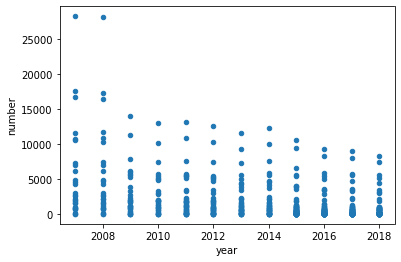

In [ ]:
MI=df.loc[df['state']=='MI']
print(MI['number'].max())
print(MI['year'].median())
print(MI['number'].min())
MI
lines=MI.plot.scatter(x='year',y='number')

**The plot shows that homeless total trend in Michigan gradually decreases from 2008 to 2018.**

      year state       homelessness   number     region state_new  \
2025  2018    CA  Homeless Veterans  10836.0       west     State   
2041  2018    MA  Homeless Veterans    985.0  northeast     State   
2044  2018    MI  Homeless Veterans    693.0    midwest     State   
2049  2018    NJ  Homeless Veterans    555.0  northeast     State   
2052  2018    NY  Homeless Veterans   1224.0  northeast     State   

             homeless_type  
2025  Homeless_individuals  
2041  Homeless_individuals  
2044  Homeless_individuals  
2049  Homeless_individuals  
2052  Homeless_individuals  


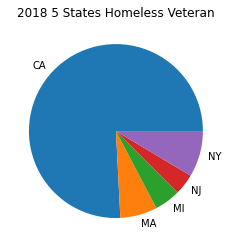

In [ ]:
states=['MI',"NY","CA","MA","NJ"]
homeless_selected=df[df['state'].isin(states)]
year_2018=homeless_selected.loc[homeless_selected['year']==2018]
homeless_2018_veteran=year_2018.loc[year_2018['homelessness']=='Homeless Veterans']
print(homeless_2018_veteran)

for_pie=homeless_2018_veteran[['state','number']]
for_pie

labels=['CA','MA','MI','NJ','NY']
x=[10836,985,693,555,1224]

fig=plt.figure()
plt.pie(x,labels=labels)
plt.title("2018 5 States Homeless Veteran")
plt.savefig("PieChart.jpg")
plt.show()

**Choose 5 certain states homeless number (as in Veterans) in 2018 to see distribution.**

In [ ]:
df.head()
# MI,Veteran
df_m1 = df[(df['homelessness'] == 'Overall Homeless' ) & (df['region'] == 'west')]
df_m1.head()
fig=px.box(df_m1,x='year',y='number',color='year')
fig.show()

In [ ]:
df_m2 = df[(df['state'] != 'Total')]

px.sunburst(df_m2,path=['region','state'],values='number',color='number')

**Overall Homeless in West Region box charts. **

In [ ]:
df_m3 = df[(df['homelessness'] != 'Overall Homeless' ) & (df['region'] == 'midwest')]
px.sunburst(df_m3,path=['year','state'],values='number',color='year')

**Midwest area Homeless distribution sort by year and states. **

In [ ]:
df.head(50)

,year,state,homelessness,number,region,state_new,homeless_type
0,2018,AK,Overall Homeless,2016.0,west,State,Overall_homeless
1,2018,AL,Overall Homeless,3434.0,southeast,State,Overall_homeless
2,2018,AR,Overall Homeless,2712.0,southeast,State,Overall_homeless
3,2018,AZ,Overall Homeless,9865.0,southwest,State,Overall_homeless
4,2018,CA,Overall Homeless,129972.0,west,State,Overall_homeless
5,2018,CO,Overall Homeless,10857.0,west,State,Overall_homeless
6,2018,CT,Overall Homeless,3976.0,northeast,State,Overall_homeless
7,2018,DC,Overall Homeless,6904.0,southeast,State,Overall_homeless
8,2018,DE,Overall Homeless,1082.0,southeast,State,Overall_homeless
9,2018,FL,Overall Homeless,31030.0,southeast,State,Overall_homeless


#### GROUPBY Statements

In [ ]:
# Based on our data we want to understand the Top 10 States across the USA for the Homeless people and the counts to see the variation from Top 10 States to the Least 10 States

df4 = df3.groupby('state')['number'].sum().reset_index()
df4 = df4.sort_values(by = 'number' ,ascending= False)
Top_10_states=df4.head(10)
Top_10_states

,state,number
4,CA,9393924.0
36,NY,6339749.0
9,FL,3350270.0
46,TX,2459512.0
51,WA,1672103.0
20,MA,1597649.0
40,PA,1287885.0
10,GA,1232911.0
39,OR,1188113.0
15,IL,1115358.0


In [ ]:
# # Based on our data we want to understand the Least 10 States across the USA for the Homeless people and their counts to see the variation from Top 10 States to the Least 10 States

df4 = df3.groupby('state')['number'].sum().reset_index()
df4 = df4.sort_values(by = 'number' ,ascending= False)
Least_10_states=df4.tail(10)
Least_10_states

,state,number
28,MT,124456.0
42,RI,109529.0
50,VT,107108.0
8,DE,86091.0
44,SD,76466.0
30,ND,75189.0
11,GU,69448.0
54,WY,66253.0
49,VI,34889.0
26,MP,7535.0


In [ ]:
# df